# Decoding Sector Valuation Dynamics

Exploring the Nexus of Company Fundamentals, Economic Indicators, and Equity Valuations via Predictive Analytics

## Real Estate Sector

In [1]:
from utils import Utils
import pandas as pd
import numpy as np

SECTOR = 'Real Estate'

%matplotlib inline

# Import data
df = pd.read_csv('data/feature_selection.csv')
df = df.query(f'`GICS Sector` == "{SECTOR}"')

utils = Utils()

df, features, target = utils.init_df(df)

utils.df_sector_info(df)
display(df.head())

Shape: (10823, 63)
Earnings: 1770 (16.35%)
Companies: 111


Total  Total %  Earnings  Earnings %  Earnings % of Total
cap                                                             
small   4560    42.13       513       11.25                28.98
large   3296    30.45       768       23.30                43.39
mid     2967    27.41       489       16.48                27.63

Total  Total %  Earnings  \
GICS Industry Group                                                      
Equity Real Estate Investment Trusts (REITs)   9932    91.77      1603   
Real Estate Management & Development            891     8.23       167   

                                              Earnings %  Earnings % of Total  
GICS Industry Group                                                            
Equity Real Estate Investment Trusts (REITs)       16.14                90.56  
Real Estate Management & Development               18.74                 9.44

Total  \
GICS Industry Group                          GICS Industry                                 
Equity Real Estate Investment Trusts (REITs) Diversified REITs                       749   
                                             Health Care REITs                      1202   
                                             Hotel & Resort REITs                   1156   
                                             Industrial REITs                        652   
                                             Office REITs                           1335   
                                             Residential REITs                      1245   
                                             Retail REITs                           1675   
                                             Specialized REITs                      1918   
Real Estate Management & Development         Real Estate Management & Development    891   

                                                                                   Total %  \
GICS Industry Group                          GICS Industry                                   
Equity Real Estate Investment Trusts (REITs) Diversified REITs                        6.92   
                                             Health Care REITs                       11.11   
                                             Hotel & Resort REITs                    10.68   
                                             Industrial REITs                         6.02   
                                             Office REITs                            12.33   
                                             Residential REITs                       11.50   
                                             Retail REITs                            15.48   
                                             Specialized REITs                       17.72   
Real Estate Management & Development         Real Estate Management & Development     8.23   

                                                                                   Earnings  \
GICS Industry Group                          GICS Industry                                    
Equity Real Estate Investment Trusts (REITs) Diversified REITs                          108   
                                             Health Care REITs                          190   
                                             Hotel & Resort REITs                       174   
                                             Industrial REITs                            88   
                                             Office REITs                               169   
                                             Residential REITs                          347   
                                             Retail REITs                               148   
                                             Specialized REITs                          379   
Real Estate Management & Development         Real Estate Management & Development       167   

                                                                                   Earnings %  \
GICS Industry Group                          GICS Industry                                      
Equity Real Estate Investment Trusts (REITs) Diversified REITs                          14.42   
                                             Health Care REITs                          15.81   
                                             Hotel & Resort REITs                       15.05   
                                             Industrial REITs                           13.50   
                                             Office REITs                               12.66   
                                             Residential REITs                          27.87   
                                             Retail REITs                                8.84   
                                             Specialized REITs                          19.76   
Real Estate Managem

Total  \
GICS Industry                        GICS Sub-Industry                        
Diversified REITs                    Diversified REITs                  749   
Health Care REITs                    Health Care REITs                 1202   
Hotel & Resort REITs                 Hotel & Resort REITs              1156   
Industrial REITs                     Industrial REITs                   652   
Office REITs                         Office REITs                      1335   
Real Estate Management & Development Real Estate Development            111   
                                     Real Estate Services               780   
Residential REITs                    Multi-Family Residential REITs    1043   
                                     Single-Family Residential REITs    202   
Retail REITs                         Retail REITs                      1675   
Specialized REITs                    Data Center REITs                  204   
                                     Other Specialized REITs            686   
                                     Self-Storage REITs                 323   
                                     Telecom Tower REITs                342   
                                     Timber REITs                       363   

                                                                      Total %  \
GICS Industry                        GICS Sub-Industry                          
Diversified REITs                    Diversified REITs                   6.92   
Health Care REITs                    Health Care REITs                  11.11   
Hotel & Resort REITs                 Hotel & Resort REITs               10.68   
Industrial REITs                     Industrial REITs                    6.02   
Office REITs                         Office REITs                       12.33   
Real Estate Management & Development Real Estate Development             1.03   
                                     Real Estate Services                7.21   
Residential REITs                    Multi-Family Residential REITs      9.64   
                                     Single-Family Residential REITs     1.87   
Retail REITs                         Retail REITs                       15.48   
Specialized REITs                    Data Center REITs                   1.88   
                                     Other Specialized REITs             6.34   
                                     Self-Storage REITs                  2.98   
                                     Telecom Tower REITs                 3.16   
                                     Timber REITs                        3.35   

                                                                      Earnings  \
GICS Industry                        GICS Sub-Industry                           
Diversified REITs                    Diversified REITs                     108   
Health Care REITs                    Health Care REITs                     190   
Hotel & Resort REITs                 Hotel & Resort REITs                  174   
Industrial REITs                     Industrial REITs                       88   
Office REITs                         Office REITs                          169   
Real Estate Management & Development Real Estate Development                20   
                                     Real Estate Services                  147   
Residential REITs                    Multi-Family Residential REITs        283   
                                     Single-Family Residential REITs        64   
Retail REITs                         Retail REITs                          148   
Specialized REITs                    Data Center REITs                      40   
                                     Other Specialized REITs                77   
                                     Self-Storage REITs                     64   
                                     Telecom Tower REITs                    78   
                                    

symbol    cap  GICS Sector                           GICS Industry Group  \
685    AAT  small  Real Estate  Equity Real Estate Investment Trusts (REITs)   
686    AAT  small  Real Estate  Equity Real Estate Investment Trusts (REITs)   
687    AAT  small  Real Estate  Equity Real Estate Investment Trusts (REITs)   
688    AAT  small  Real Estate  Equity Real Estate Investment Trusts (REITs)   
689    AAT  small  Real Estate  Equity Real Estate Investment Trusts (REITs)   

         GICS Industry  GICS Sub-Industry       date  adjclose  TotalRevenue  \
685  Diversified REITs  Diversified REITs 2014-01-31  0.064906           NaN   
686  Diversified REITs  Diversified REITs 2014-03-31  0.027151           NaN   
687  Diversified REITs  Diversified REITs 2014-04-30  0.006224     -0.010287   
688  Diversified REITs  Diversified REITs 2014-05-30  0.010310           NaN   
689  Diversified REITs  Diversified REITs 2014-06-30  0.013793           NaN   

     OperatingRevenue  NetIncome  BasicEPS   EBITDA      EBIT  Current Ratio  \
685               NaN        NaN       NaN      NaN       NaN            NaN   
686               NaN        NaN       NaN      NaN       NaN            NaN   
687         -0.015352   -0.03605       0.0  0.00314 -0.003176       2.831814   
688               NaN        NaN       NaN      NaN       NaN            NaN   
689               NaN        NaN       NaN      NaN       NaN            NaN   

     Quick Ratio  Gross Profit Margin  Net Profit Margin  Cash Flow Margin  \
685          NaN                  NaN                NaN               NaN   
686          NaN                  NaN                NaN               NaN   
687          NaN             0.016023          -0.026031          0.550315   
688          NaN                  NaN                NaN               NaN   
689          NaN                  NaN                NaN               NaN   

     Operating Margin       ROA      CROA       ROE  Efficiency Ratio  \
685               NaN       NaN       NaN       NaN               NaN   
686               NaN       NaN       NaN       NaN               NaN   
687          0.009107 -0.059914  0.496383 -0.083947         -0.006025   
688               NaN       NaN       NaN       NaN               NaN   
689               NaN       NaN       NaN       NaN               NaN   

     Inventory Turnover  Debt to Equity  Debt Ratio  Interest Coverage  \
685                 NaN             NaN         NaN                NaN   
686                 NaN             NaN         NaN                NaN   
687                 NaN       -0.043028   -0.017922           0.007354   
688                 NaN             NaN         NaN                NaN   
689                 NaN             NaN         NaN                NaN   

     Cash Flow to Debt  Assets to Equity  R&D to Revenue  \
685                NaN               NaN             NaN   
686                NaN               NaN             NaN   
687            0.52369         -0.025565             NaN   
688                NaN               NaN             NaN   
689                NaN               NaN             NaN   

     Investment CF to OCF  Financing CF to OCF  FreeCashFlow     Capex  \
685                   NaN                  NaN           NaN       NaN   
686                   NaN                  NaN           NaN       NaN   
687             -0.120658             2.867849      0.412678  0.366589   
688                   NaN                  NaN           NaN       NaN   
689                   NaN                  NaN           NaN       NaN   

     Book Value Per Share  Tangible Book Value Per Share  fed_funds  \
685                   NaN                            NaN   0.000000   
686                   NaN                            NaN   0.000000   
687              0.016588                       0.032827   0.500000   
688                   NaN                            NaN  -0.111111   
689                   NaN                      

In [2]:
# Lets see if there are any features that are null for nearly all the earnings reports
utils.feat_nulls(df)

(1770, 63)


Nulls  Null %
R&D to Revenue             1684   95.14
Inventory Turnover         1653   93.39
Quick Ratio                1517   85.71
avg_home_price             1136   64.18
gdp_real                   1008   56.95
...                         ...     ...
Cash Flow to Debt             0    0.00
Assets to Equity              0    0.00
cap                           0    0.00
Financing CF to OCF           0    0.00
10yr-2yr Treasury Spread      0    0.00

[63 rows x 2 columns]

R&D to Revenue, Inventory Turnover, and Quick Ratio are missing most of the earnings reports, I'll drop it.

In [3]:
# Drop R&D to Revenue, Inventory Turnover, and Quick Ratio
df = df.drop(columns=['R&D to Revenue', 'Inventory Turnover', 'Quick Ratio'])

features, _ = utils.features(df)

### Distribution of Target

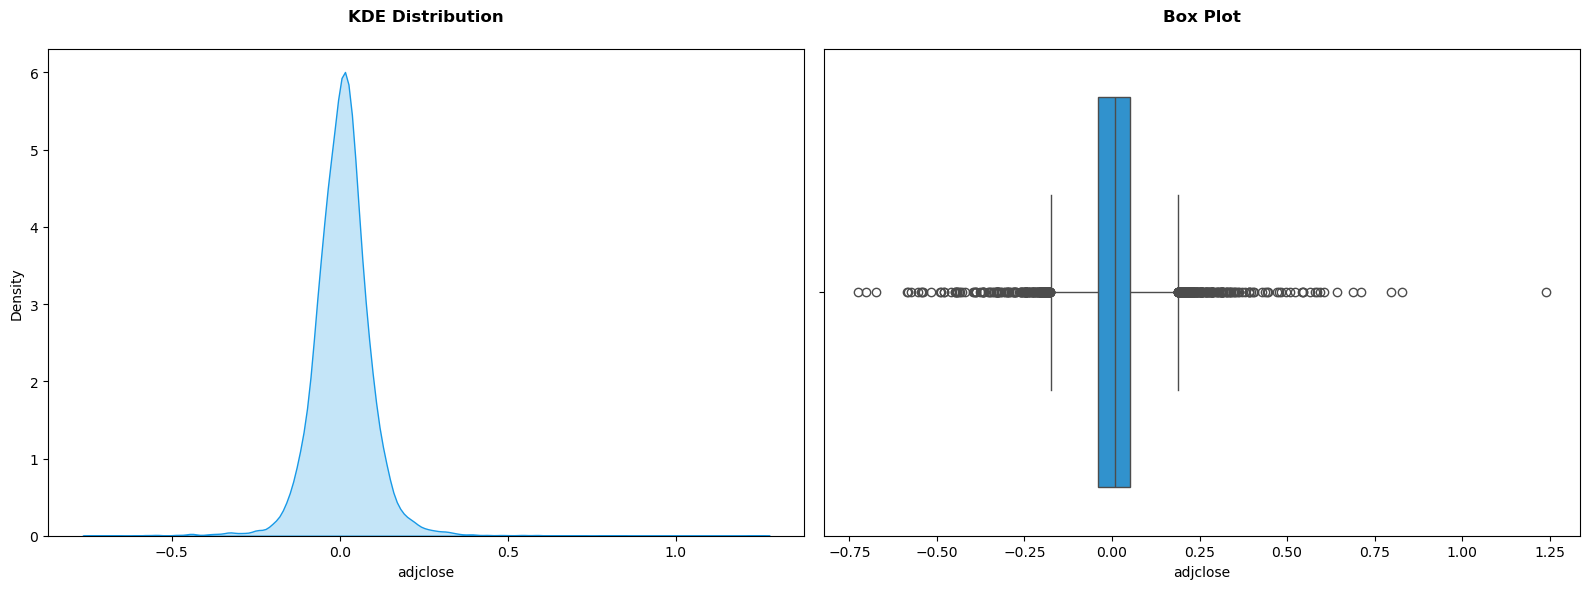

In [4]:
# Plot the distribution of the target
utils.plot.dist(df[target])

The target distribution is not too skewed, lets take a look at the bottom and top of the distribution to see what may be causing some of the outliers. The bottom of the distribution may reveal companies that were in a period of financial distress (bankruptcy, scandal, etc.).

In [5]:
# Top of the distribution
df.nlargest(15, target)

symbol    cap  GICS Sector  \
50441    EXPI  small  Real Estate   
36350    CTRE  small  Real Estate   
69989    IIPR  small  Real Estate   
152342    XHR  small  Real Estate   
50446    EXPI  small  Real Estate   
109463     PK    mid  Real Estate   
130322    SVC  small  Real Estate   
50439    EXPI  small  Real Estate   
66131     HPP  small  Real Estate   
124776    SKT  small  Real Estate   
124782    SKT  small  Real Estate   
50424    EXPI  small  Real Estate   
107430    PEB  small  Real Estate   
141164   UNIT  small  Real Estate   
42484     DRH  small  Real Estate   

                                 GICS Industry Group  \
50441           Real Estate Management & Development   
36350   Equity Real Estate Investment Trusts (REITs)   
69989   Equity Real Estate Investment Trusts (REITs)   
152342  Equity Real Estate Investment Trusts (REITs)   
50446           Real Estate Management & Development   
109463  Equity Real Estate Investment Trusts (REITs)   
130322  Equity Real Estate Investment Trusts (REITs)   
50439           Real Estate Management & Development   
66131   Equity Real Estate Investment Trusts (REITs)   
124776  Equity Real Estate Investment Trusts (REITs)   
124782  Equity Real Estate Investment Trusts (REITs)   
50424           Real Estate Management & Development   
107430  Equity Real Estate Investment Trusts (REITs)   
141164  Equity Real Estate Investment Trusts (REITs)   
42484   Equity Real Estate Investment Trusts (REITs)   

                               GICS Industry        GICS Sub-Industry  \
50441   Real Estate Management & Development     Real Estate Services   
36350                      Health Care REITs        Health Care REITs   
69989                       Industrial REITs         Industrial REITs   
152342                  Hotel & Resort REITs     Hotel & Resort REITs   
50446   Real Estate Management & Development     Real Estate Services   
109463                  Hotel & Resort REITs     Hotel & Resort REITs   
130322                  Hotel & Resort REITs     Hotel & Resort REITs   
50439   Real Estate Management & Development     Real Estate Services   
66131                           Office REITs             Office REITs   
124776                          Retail REITs             Retail REITs   
124782                          Retail REITs             Retail REITs   
50424   Real Estate Management & Development     Real Estate Services   
107430                  Hotel & Resort REITs     Hotel & Resort REITs   
141164                     Specialized REITs  Other Specialized REITs   
42484                   Hotel & Resort REITs     Hotel & Resort REITs   

             date  adjclose  TotalRevenue  OperatingRevenue  NetIncome  \
50441  2020-08-31  1.238551      0.302497          0.302497  49.151516   
36350  2014-10-31  0.827682           NaN               NaN        NaN   
69989  2017-12-29  0.796203           NaN               NaN        NaN   
152342 2020-11-30  0.709951           NaN               NaN        NaN   
50446  2021-01-29  0.688688           NaN               NaN        NaN   
109463 2020-11-30  0.643504      1.333333          1.435897  -0.065637   
130322 2022-10-31  0.604797           NaN               NaN        NaN   
50439  2020-06-30  0.594948           NaN               NaN        NaN   
66131  2023-12-29  0.586031           NaN               NaN        NaN   
124776 2020-04-30  0.580678           NaN               NaN        NaN   
124782 2021-01-29  0.564792           NaN               NaN        NaN   
50424  2019-01-31  0.545197           NaN               NaN        NaN   
107430 2020-11-30  0.544241           NaN               NaN        NaN   
141164 2020-02-28  0.541864           NaN               NaN        NaN   
42484  2020-11-30  0.522267      1.456794          1.649315  -0.093567   

         BasicEPS    EBITDA       EBIT  Current Ratio  Gross Profit Margin  \
50441   47.465267  7.627451  38.426540       0.037200            -0.058331   
36350  

In [6]:
# Bottom of the distribution
df.nsmallest(15, target)

symbol    cap  GICS Sector  \
84868     MAC  small  Real Estate   
130299    SVC  small  Real Estate   
65758    HOUS  small  Real Estate   
47656     EPR    mid  Real Estate   
124775    SKT  small  Real Estate   
29404    CLDT  small  Real Estate   
127311    SPG  large  Real Estate   
70545     INN  small  Real Estate   
109456     PK    mid  Real Estate   
124295   SITC  small  Real Estate   
141153   UNIT  small  Real Estate   
150750    WSR  small  Real Estate   
145937    VTR  large  Real Estate   
104623    OUT  small  Real Estate   
21416     BRX    mid  Real Estate   

                                 GICS Industry Group  \
84868   Equity Real Estate Investment Trusts (REITs)   
130299  Equity Real Estate Investment Trusts (REITs)   
65758           Real Estate Management & Development   
47656   Equity Real Estate Investment Trusts (REITs)   
124775  Equity Real Estate Investment Trusts (REITs)   
29404   Equity Real Estate Investment Trusts (REITs)   
127311  Equity Real Estate Investment Trusts (REITs)   
70545   Equity Real Estate Investment Trusts (REITs)   
109456  Equity Real Estate Investment Trusts (REITs)   
124295  Equity Real Estate Investment Trusts (REITs)   
141153  Equity Real Estate Investment Trusts (REITs)   
150750  Equity Real Estate Investment Trusts (REITs)   
145937  Equity Real Estate Investment Trusts (REITs)   
104623  Equity Real Estate Investment Trusts (REITs)   
21416   Equity Real Estate Investment Trusts (REITs)   

                               GICS Industry        GICS Sub-Industry  \
84868                           Retail REITs             Retail REITs   
130299                  Hotel & Resort REITs     Hotel & Resort REITs   
65758   Real Estate Management & Development     Real Estate Services   
47656                      Specialized REITs  Other Specialized REITs   
124775                          Retail REITs             Retail REITs   
29404                   Hotel & Resort REITs     Hotel & Resort REITs   
127311                          Retail REITs             Retail REITs   
70545                   Hotel & Resort REITs     Hotel & Resort REITs   
109456                  Hotel & Resort REITs     Hotel & Resort REITs   
124295                          Retail REITs             Retail REITs   
141153                     Specialized REITs  Other Specialized REITs   
150750                          Retail REITs             Retail REITs   
145937                     Health Care REITs        Health Care REITs   
104623                     Specialized REITs  Other Specialized REITs   
21416                           Retail REITs             Retail REITs   

             date  adjclose  TotalRevenue  OperatingRevenue  NetIncome  \
84868  2020-03-31 -0.724290           NaN               NaN        NaN   
130299 2020-03-31 -0.701327           NaN               NaN        NaN   
65758  2020-03-31 -0.675297           NaN               NaN        NaN   
47656  2020-03-31 -0.584624           NaN               NaN        NaN   
124775 2020-03-31 -0.582638           NaN               NaN        NaN   
29404  2020-03-31 -0.573888           NaN               NaN        NaN   
127311 2020-03-31 -0.554274           NaN               NaN        NaN   
70545  2020-03-31 -0.544768           NaN               NaN        NaN   
109456 2020-03-31 -0.543439           NaN               NaN        NaN   
124295 2020-03-31 -0.539303           NaN               NaN        NaN   
141153 2019-02-28 -0.515821           NaN               NaN        NaN   
150750 2020-03-31 -0.491595           NaN               NaN        NaN   
145937 2020-03-31 -0.487463           NaN               NaN        NaN   
104623 2020-03-31 -0.481102           NaN               NaN        NaN   
21416  2020-03-31 -0.478309           NaN               NaN        NaN   

        BasicEPS  EBITDA  EBIT  Current Ratio  Gross Profit Margin  \
84868        NaN     NaN   NaN            NaN                  NaN   
130299       NaN     Na

All of the bottom of the distribution are resultant of the COVID-19 pandemic.

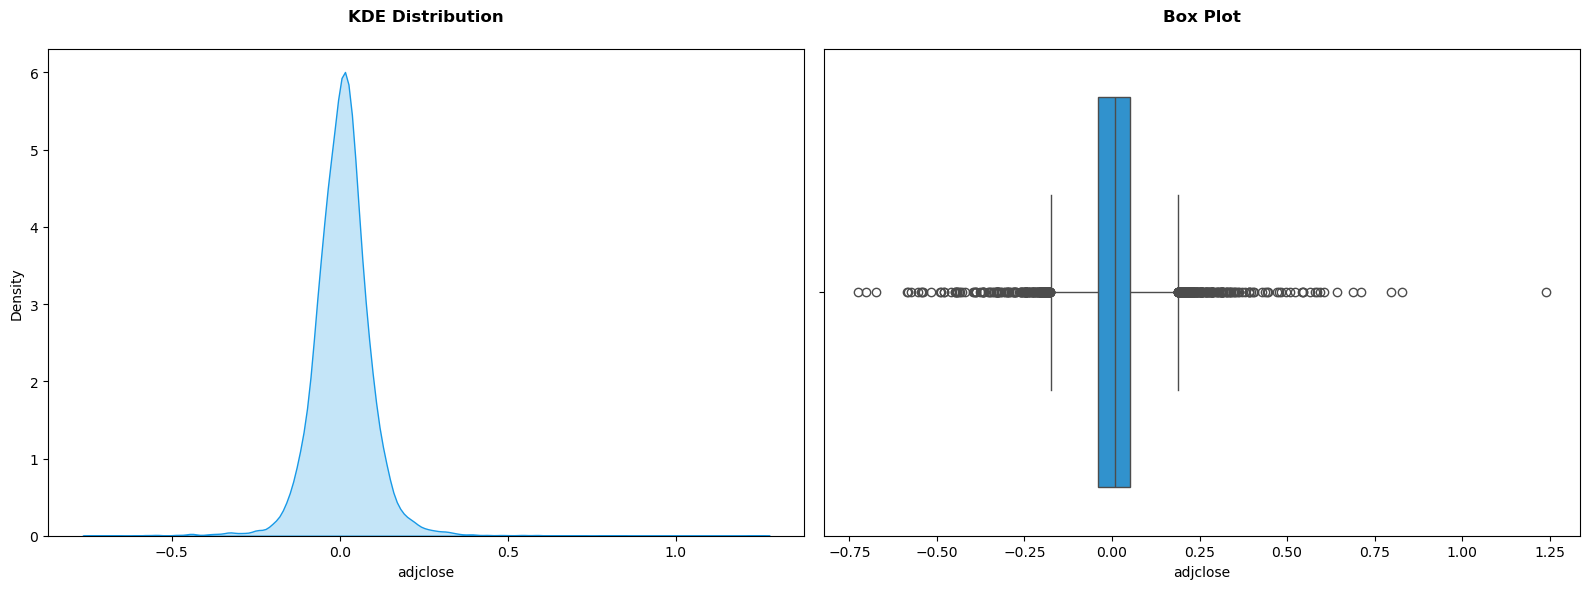

In [7]:
# Plot the distribution of the target
utils.plot.dist(df[target])

I'll winsorize the target to mitigate the effect of outliers.

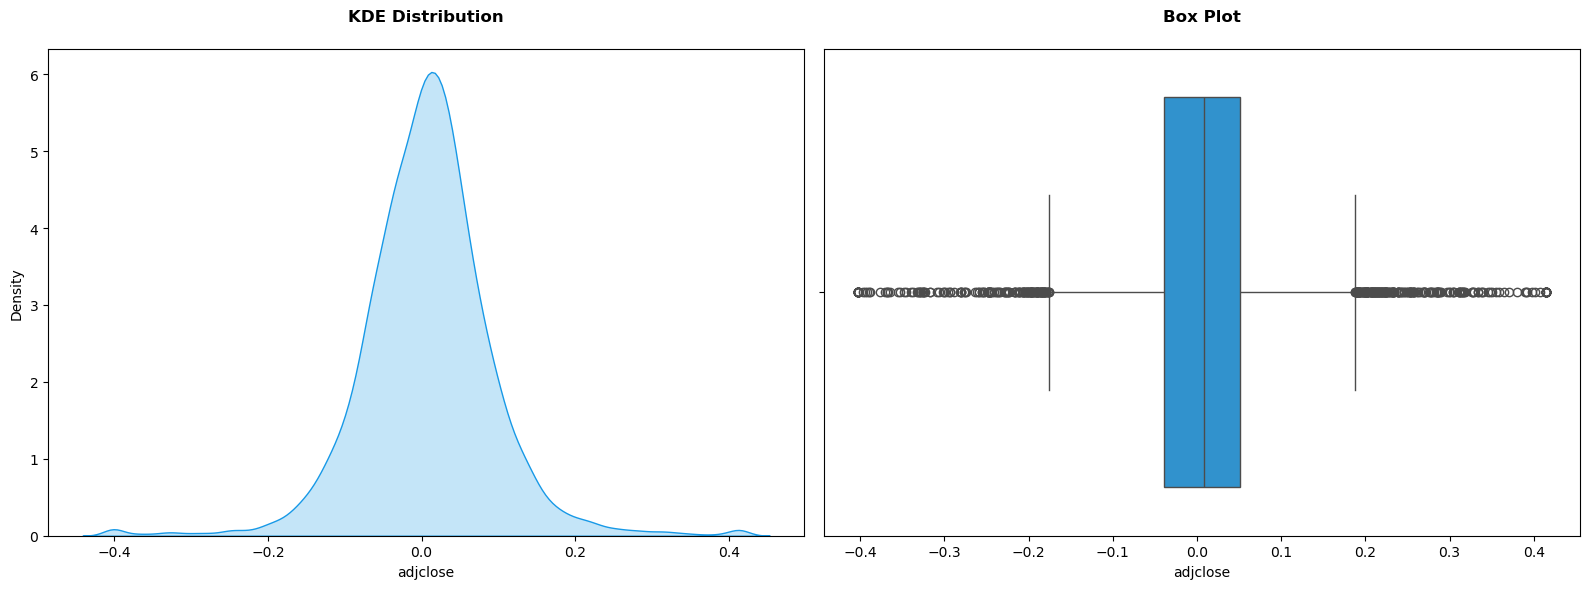

In [8]:
# Winsorize the target
df[target] = utils.stats.winsorize(df[target], 4)
utils.plot.dist(df[target])

### Outlier Identification

In [9]:
# Knee plot	
# Using the rule of thumb for n-features + 1
utils.outlier.knee_plot(df[features], n_neighbors=len(features) + 1)

In [10]:
outliers = utils.outlier.dbscan(df, features, eps=21.67, min_samples=len(features) + 1).query('labels == -1').drop(columns='labels')

print(outliers.shape)
display(outliers.head())

(42, 60)


symbol    cap  GICS Sector  \
10756   APLE  small  Real Estate   
24553   CBRE  large  Real Estate   
41892    DOC    mid  Real Estate   
42451    DRH  small  Real Estate   
42481    DRH  small  Real Estate   

                                GICS Industry Group  \
10756  Equity Real Estate Investment Trusts (REITs)   
24553          Real Estate Management & Development   
41892  Equity Real Estate Investment Trusts (REITs)   
42451  Equity Real Estate Investment Trusts (REITs)   
42481  Equity Real Estate Investment Trusts (REITs)   

                              GICS Industry     GICS Sub-Industry       date  \
10756                  Hotel & Resort REITs  Hotel & Resort REITs 2021-08-31   
24553  Real Estate Management & Development  Real Estate Services 2023-10-31   
41892                     Health Care REITs     Health Care REITs 2014-08-29   
42451                  Hotel & Resort REITs  Hotel & Resort REITs 2017-11-30   
42481                  Hotel & Resort REITs  Hotel & Resort REITs 2020-08-31   

       adjclose  TotalRevenue  OperatingRevenue  NetIncome  BasicEPS  \
10756 -0.011372      0.558814          0.561865   1.436804  1.428571   
24553 -0.061197      0.019195          0.019195  -0.053872 -0.046154   
41892  0.051846      0.425174          0.497702   0.818623  0.866667   
42451  0.030387     -0.081333         -0.085144  -0.409127 -0.388889   
42481  0.147186     -0.880120         -0.896362  -1.106022 -1.117647   

          EBITDA      EBIT  Current Ratio  Gross Profit Margin  \
10756   3.085662  2.401740       4.283927             0.721241   
24553  -0.084986 -0.111553       0.020745            -0.062877   
41892  33.482014  1.464207      -0.407394             0.007222   
42451  -0.214953 -0.314007       0.134861            -0.117688   
42481  -4.859023 -2.581412      -0.593505           -11.569558   

       Net Profit Margin  Cash Flow Margin  Operating Margin       ROA  \
10756           1.280216         16.745605          2.186669  1.439862   
24553          -0.071691         35.509201         -0.128286 -0.051924   
41892           0.872733          8.923315          0.082957  0.844642   
42451          -0.356815          0.190508         -0.217428 -0.409683   
42481         -16.567749        -25.711288        -28.285614 -1.315960   

            CROA       ROE  Efficiency Ratio  Debt to Equity  Debt Ratio  \
10756  25.716272  1.423738         -0.250645       -0.099757   -0.065503   
24553  36.244015 -0.005481               NaN        0.127335    0.074689   
41892  10.672225  0.888201         -0.009878       -0.694106   -0.574924   
42451   0.092650 -0.408443          0.054928       -0.001936   -0.004028   
42481  -4.257694 -1.187662          2.915166       -0.138809   -0.088304   

       Interest Coverage  Cash Flow to Debt  Assets to Equity  \
10756           2.393835          27.448740         -0.036655   
24553                NaN          33.794609          0.048987   
41892           1.358871          23.754101         -0.280378   
42451          -0.321580           0.097069          0.002101   
42481          -6.665286          -4.573224         -0.055397   

       Investment CF to OCF  Financing CF to OCF  FreeCashFlow     Capex  \
10756           1969.914795             0.941906     11.711472 -0.042298   
24553            -54.288616             0.984734      4.574817  0.020434   
41892            -24.184113             1.056221     12.063158  0.000000   
42451             -0.747996         -1439.313477      0.541353 -0.374323   
42481              6.668179            -0.692076     -0.275695 -0.588030   

       Book Value Per Share  Tangible Book Value Per Share  fed_funds  \
10756              0.009686                       0.009686  -0.142857   
24553             -0.029534                      -0.273691   0.000000   
41892              0.023562                       0.156530  -0.125000   
42451             -0.001155                      -0.001113   0.000000   
42481             -0.038636     

In [11]:
# Remove identified outliers
print(df.shape)
df = df.drop(outliers.index)
df.shape

(10823, 61)


(10781, 61)

### Feature Selection

#### Autocorrelation

I am most interested in the autocorrelation of the income/revenue derived features as there may be seasonality/cycles in the sector.

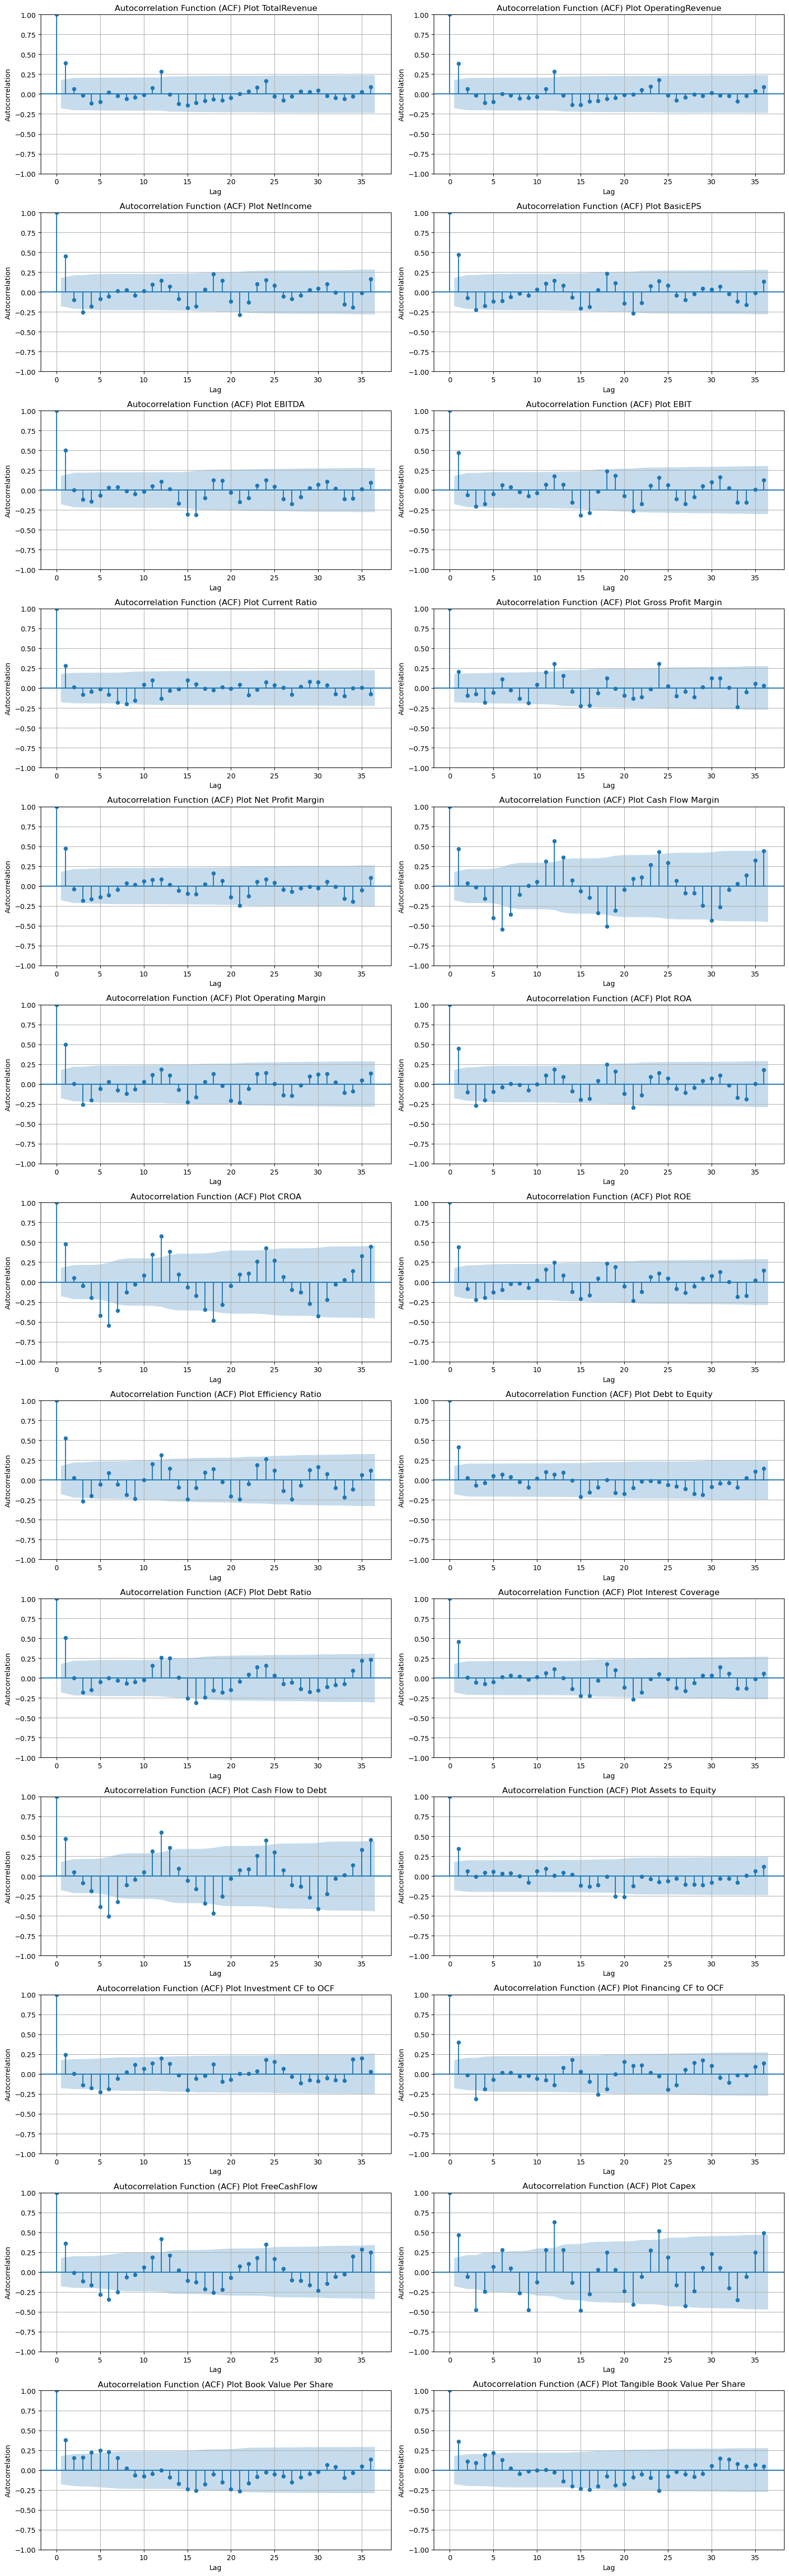

In [12]:
# ACF plot
utils.plot.acf(df, [feat for feat in features if feat not in utils.features_econ])

6 month: CROA, Cash Flow to Debt, FreeCashFlow

3 month: Gross Profit Margin, Cash Flow Margin, Efficiency Ratio, Capex

In [13]:
# 6 Month Lags (CROA, Cash Flow to Debt, FreeCashFlow)
lag6 = ['CROA', 'Cash Flow to Debt', 'FreeCashFlow']
df = utils.lag_features(df, lag6, 6)

# 3 Month Lags (Gross Profit Margin, Cash Flow Margin, Efficiency Ratio, Capex)
lag3 = ['Gross Profit Margin', 'Cash Flow Margin', 'Efficiency Ratio', 'Capex']
df = utils.lag_features(df, lag3, 3)

features, lag_features = utils.features(df)
all_features = np.concatenate([features, lag_features])

#### Multicollinearity

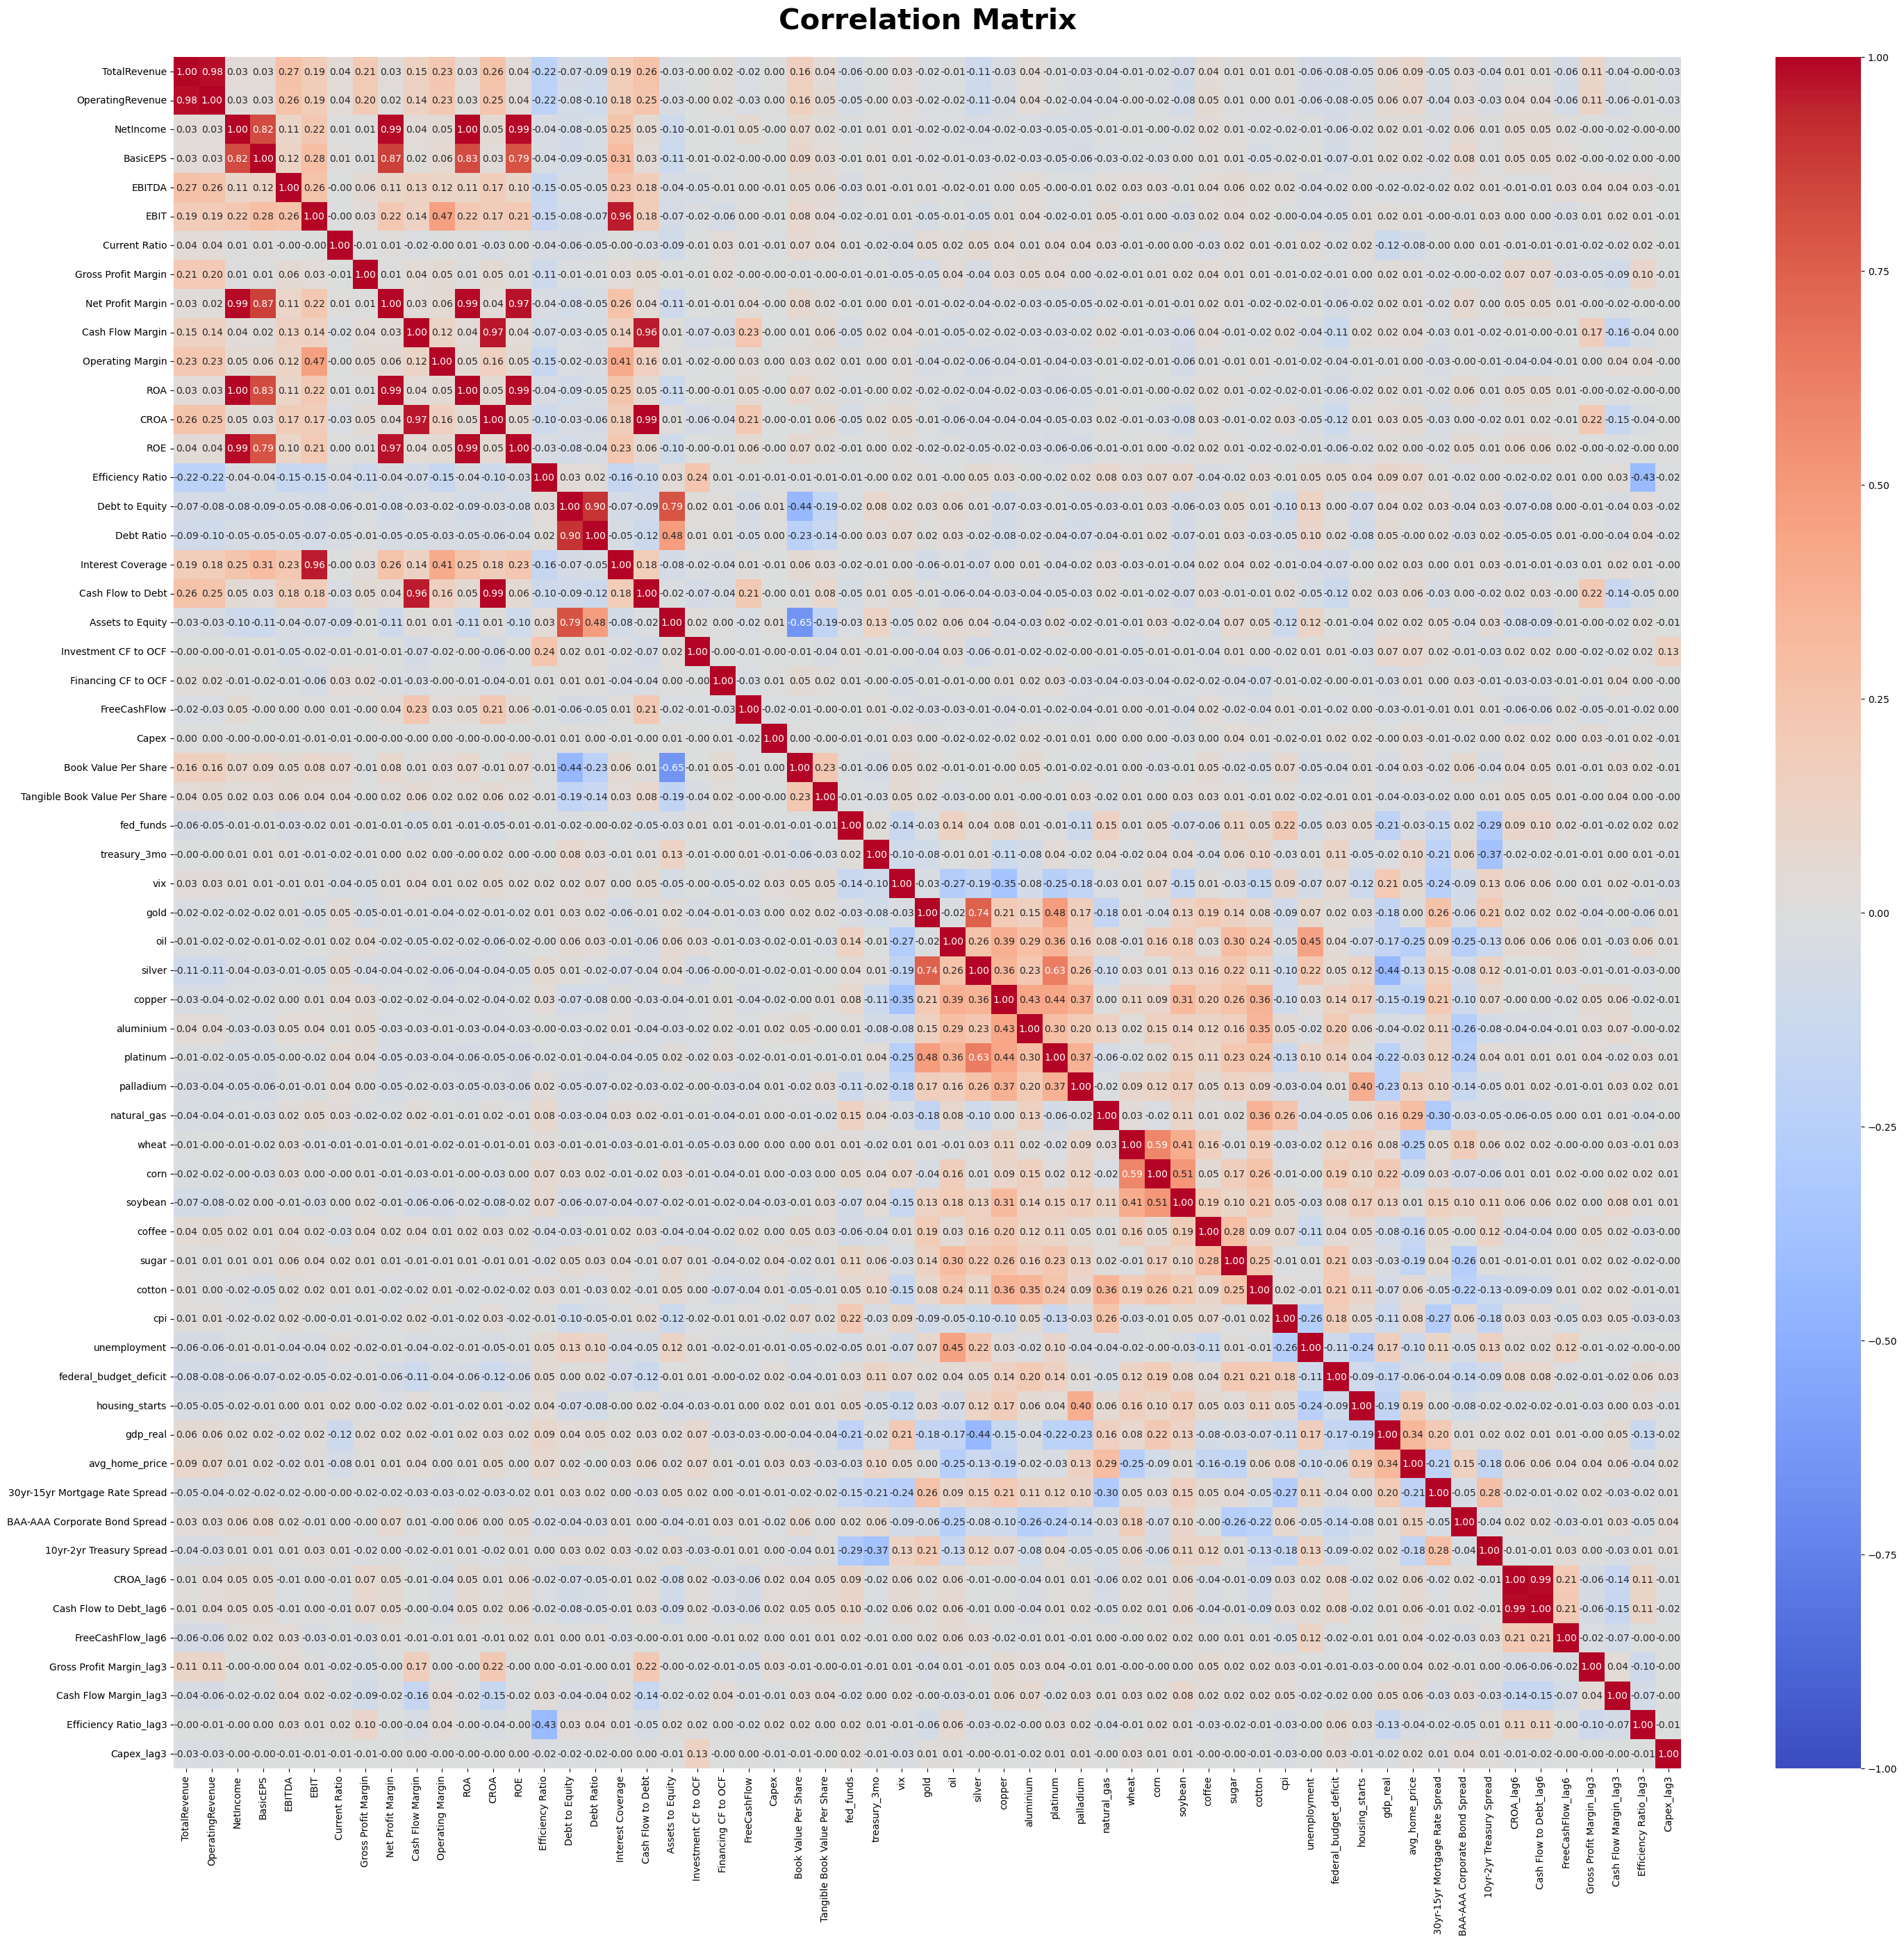

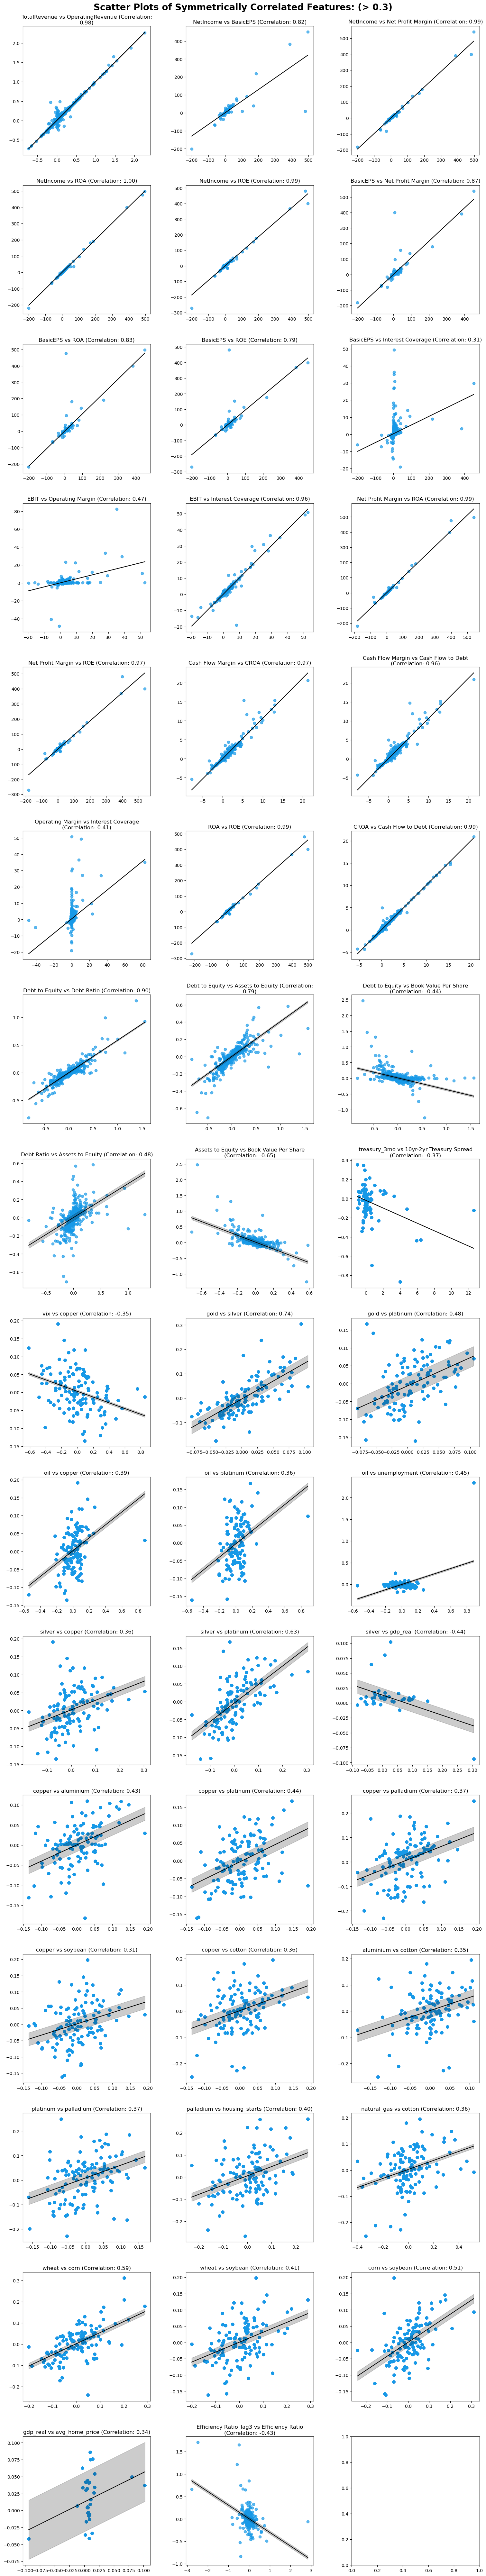



Asymmetrically Correlated Features: None with correlation >= 0.3.


In [14]:
utils.plot.correlation_matrix(df[all_features], lower_bound=0.3, sort=False, display_scatter=True)

Assets to Equity and Book Value per Share have an interesting moderate correlation, I'll drop Assets to Equity given its similarity to Debt to Equity and Debt Ratio which are not as correlated with Book Value per Share.

In [15]:
# Drop Assets to Equity
df = df.drop(columns='Assets to Equity')

features, lag_features = utils.features(df)
all_features = np.concatenate([features, lag_features])

In [16]:
vif = utils.stats.vif(df[all_features])
vif.query('VIF >= 5')

Features         VIF
12                     ROA  574.898090
3                NetIncome  518.444975
9        Net Profit Margin  183.644376
13                    CROA  147.705670
19       Cash Flow to Debt  118.256790
14                     ROE   89.828327
53  Cash Flow to Debt_lag6   60.881903
52               CROA_lag6   60.792122
1             TotalRevenue   30.115939
2         OperatingRevenue   29.348329
10        Cash Flow Margin   22.732874
16          Debt to Equity    8.490484
6                     EBIT    7.839405
17              Debt Ratio    7.804928
18       Interest Coverage    7.088482
4                 BasicEPS    6.723268

### Modeling

#### Linear

Checking Features: [['NetIncome', 'ROA', 'BasicEPS', 'ROE', 'Net Profit Margin'], ['Debt Ratio', 'Debt to Equity'], ['TotalRevenue', 'OperatingRevenue'], ['EBIT', 'Interest Coverage'], ['Current Ratio'], ['Cash Flow Margin', 'CROA', 'Cash Flow to Debt'], ['Tangible Book Value Per Share', 'Book Value Per Share'], ['gold', 'silver', 'platinum'], ['copper', 'aluminium'], ['wheat', 'corn', 'soybean'], ['Cash Flow Margin_lag3'], ['CROA_lag6', 'Cash Flow to Debt_lag6']]
Baseline: 29.1269%


 50%|█████     | 3/6 [00:00<00:00,  6.26it/s]

100%|██████████| 6/6 [00:00<00:00,  6.44it/s]


Keep: ('NetIncome',)
Best Subset Gain: 0.3057%
Baseline: 29.4326%


100%|██████████| 3/3 [00:00<00:00,  6.78it/s]


Keep: ('Debt Ratio',)
Best Subset Loss: 0.0334%
Baseline: 29.3992%


100%|██████████| 3/3 [00:00<00:00,  6.86it/s]


Keep: ('TotalRevenue',)
Best Subset Gain: 0.0058%
Baseline: 29.4050%


100%|██████████| 3/3 [00:00<00:00,  6.95it/s]


Keep: ()
Best Subset Gain: 0.0896%
Baseline: 29.4946%


100%|██████████| 2/2 [00:00<00:00,  7.03it/s]


Keep: ('Current Ratio',)
Best Subset Gain: 0.0000%
Baseline: 29.4946%


100%|██████████| 4/4 [00:00<00:00,  6.90it/s]


Keep: ()
Best Subset Gain: 0.0073%
Baseline: 29.5019%


100%|██████████| 3/3 [00:00<00:00,  7.11it/s]


Keep: ('Book Value Per Share',)
Best Subset Gain: 0.0140%
Baseline: 29.5158%


100%|██████████| 4/4 [00:00<00:00,  7.08it/s]


Keep: ('gold',)
Best Subset Loss: 0.0091%
Baseline: 29.5067%


100%|██████████| 3/3 [00:00<00:00,  7.17it/s]


Keep: ('aluminium',)
Best Subset Loss: 0.5622%
Baseline: 28.9445%


100%|██████████| 4/4 [00:00<00:00,  7.20it/s]


Keep: ('soybean',)
Best Subset Loss: 0.5213%
Baseline: 28.4232%


100%|██████████| 2/2 [00:00<00:00,  7.25it/s]


Keep: ()
Best Subset Gain: 0.0687%
Baseline: 28.4920%


100%|██████████| 3/3 [00:00<00:00,  7.35it/s]


Keep: ('Cash Flow to Debt_lag6',)
Best Subset Gain: 0.0502%
Initial r2 score: 28.5421%
Initial mae score: 5.1627%
New r2 score: 30.4809%
New mae score: 5.1373%


Median    Mean     STD     Min     Max
R2           29.44%  30.48%   2.14%  27.72%  33.59%
Adjusted R2  29.26%  30.30%   2.15%  27.53%  33.42%
MSE           0.49%   0.49%   0.02%   0.46%   0.51%
RMSE          7.03%   7.01%   0.11%   6.81%   7.12%
MAE           5.09%   5.14%   0.11%   5.02%   5.33%
F-stat       176.04  175.69    5.51  166.58  182.31
P>F          0.0000  0.0000  0.0000  0.0000  0.0000

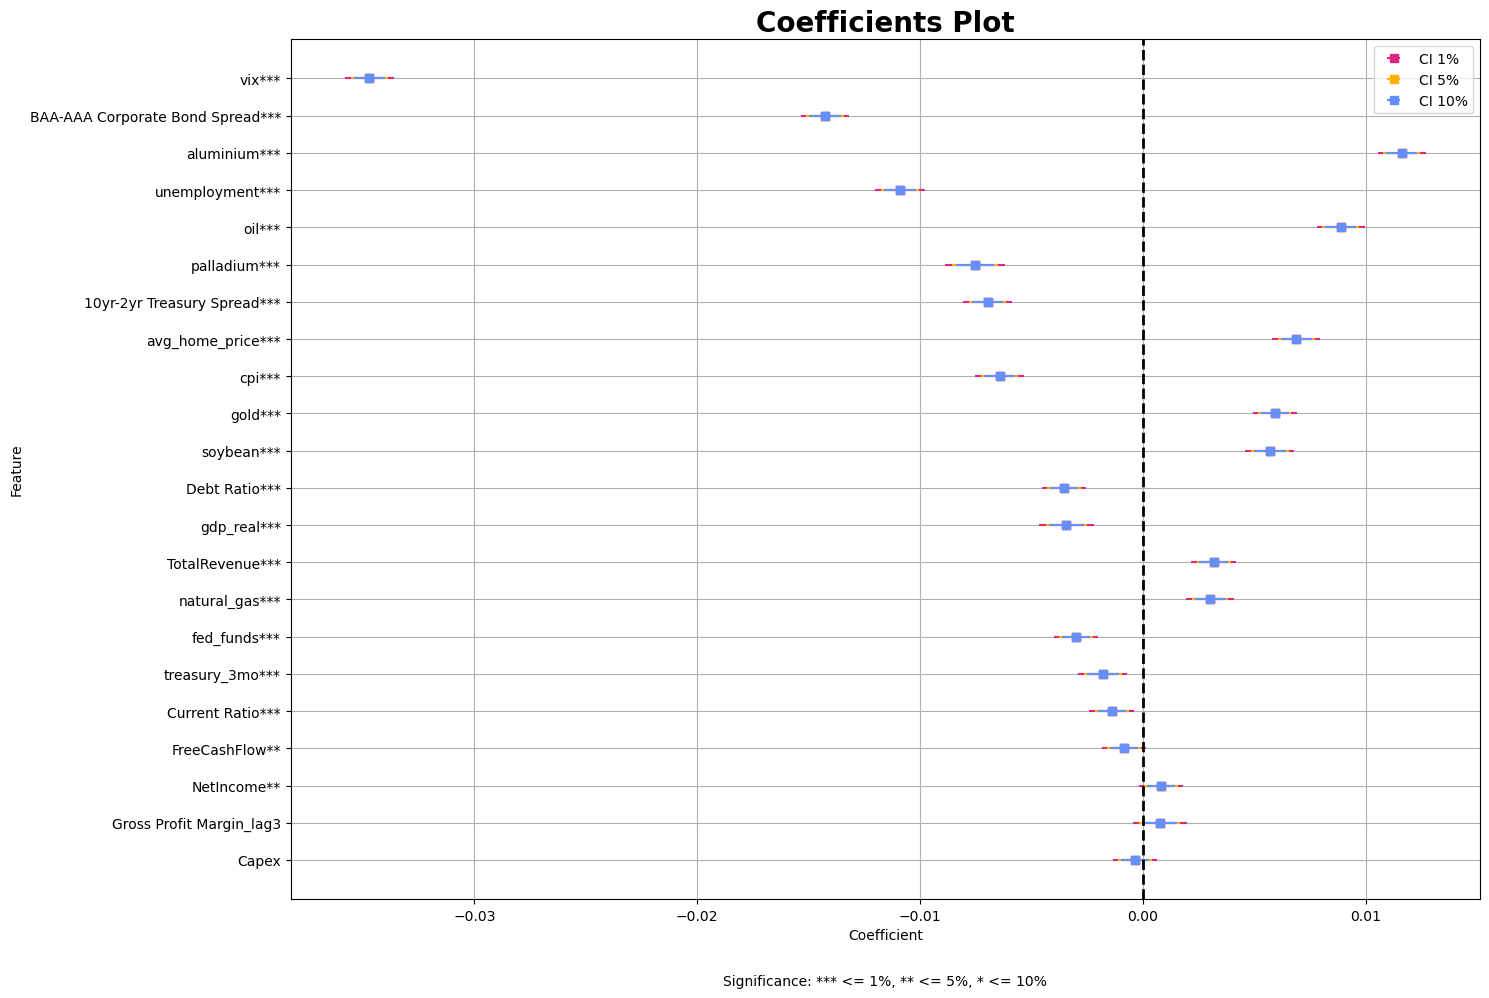

In [17]:
from cuml.preprocessing import SimpleImputer, StandardScaler
# from sklearn.feature_selection import RFECV
from cuml.linear_model import LinearRegression
from lightgbm.sklearn import LGBMRegressor
from cuml.pipeline import Pipeline
from utils import Evaluate, MulticollinearityCV, CustomCV, cross_val_score, RFECV

cv = CustomCV(mask=df['EBITDA'])

X = df[all_features].copy()
y = df[target].copy()

preprocessor = Pipeline(steps=[
	('imputer', SimpleImputer(strategy='constant', fill_value=0)),
	('scaler', StandardScaler())
])

# Create a pipeline (Linear)
pipeline_linear = Pipeline(steps=[
	('preprocessor', preprocessor),
	('model', LinearRegression(copy_X=True, fit_intercept=True, normalize=False))
])

# Multicollinearity
mc = MulticollinearityCV(pipeline_linear, cv)
mc.fit(X, y)
X_linear = X[mc.selected_features_].copy()
del mc
# RFE
rfe = RFECV(pipeline_linear, cv=cv, scoring='r2')
rfe.fit(X_linear, y)
# Unsupport features
unsupport = rfe.support_.query('Support == False')
X_linear.drop(columns=unsupport.index.to_list(), inplace=True)
del rfe, unsupport

# Evaluate the model
evaluate_linear = Evaluate(pipeline_linear, cv)
evaluate_linear.fit(X_linear, y)
display(evaluate_linear.metrics_cv_)
evaluate_linear.importance_plot()

#### LightGBM

Checking Features: [['NetIncome', 'ROA', 'BasicEPS', 'ROE', 'Net Profit Margin'], ['Debt Ratio', 'Debt to Equity'], ['TotalRevenue', 'OperatingRevenue'], ['EBIT', 'Interest Coverage'], ['Current Ratio'], ['Cash Flow Margin', 'CROA', 'Cash Flow to Debt'], ['Tangible Book Value Per Share', 'Book Value Per Share'], ['gold', 'silver', 'platinum'], ['copper', 'aluminium'], ['wheat', 'corn', 'soybean'], ['Cash Flow Margin_lag3'], ['CROA_lag6', 'Cash Flow to Debt_lag6']]


Baseline: 49.0792%


100%|██████████| 6/6 [00:09<00:00,  1.65s/it]


Keep: ('ROE',)
Best Subset Gain: 0.1295%
Baseline: 49.2098%


100%|██████████| 3/3 [00:04<00:00,  1.65s/it]


Keep: ('Debt to Equity',)
Best Subset Loss: 0.1514%
Baseline: 49.0584%


100%|██████████| 3/3 [00:04<00:00,  1.66s/it]


Keep: ('TotalRevenue',)
Best Subset Gain: 0.1961%
Baseline: 49.2515%


100%|██████████| 3/3 [00:04<00:00,  1.62s/it]


Keep: ('EBIT',)
Best Subset Loss: 0.0785%
Baseline: 49.1732%


100%|██████████| 2/2 [00:03<00:00,  1.63s/it]


Keep: ('Current Ratio',)
Best Subset Gain: 0.0005%
Baseline: 49.1731%


100%|██████████| 4/4 [00:06<00:00,  1.62s/it]


Keep: ('CROA',)
Best Subset Loss: 0.0624%
Baseline: 49.1115%


100%|██████████| 3/3 [00:04<00:00,  1.61s/it]


Keep: ('Book Value Per Share',)
Best Subset Gain: 0.0631%
Baseline: 49.1741%


100%|██████████| 4/4 [00:06<00:00,  1.62s/it]


Keep: ('silver',)
Best Subset Gain: 0.0818%
Baseline: 49.2558%


100%|██████████| 3/3 [00:04<00:00,  1.62s/it]


Keep: ()
Best Subset Loss: 0.1229%
Baseline: 49.1357%


100%|██████████| 4/4 [00:06<00:00,  1.60s/it]


Keep: ()
Best Subset Gain: 0.0928%
Baseline: 49.2284%


100%|██████████| 2/2 [00:03<00:00,  1.55s/it]


Keep: ()
Best Subset Gain: 0.1108%
Baseline: 49.3374%


100%|██████████| 3/3 [00:04<00:00,  1.54s/it]


Keep: ('Cash Flow to Debt_lag6',)
Best Subset Gain: 0.0747%
Initial r2 score: 49.4123%
Initial mae score: 4.2187%
New r2 score: 49.4123%
New mae score: 4.2188%


Median    Mean     STD     Min     Max
R2           49.56%  49.41%   2.19%  46.01%  52.29%
Adjusted R2  49.33%  49.19%   2.20%  45.77%  52.08%
MSE           0.36%   0.36%   0.01%   0.34%   0.37%
RMSE          6.02%   5.98%   0.08%   5.83%   6.07%
MAE           4.20%   4.22%   0.06%   4.14%   4.31%
F-stat       219.53  218.47    4.32  211.84  224.24
P>F          0.0000  0.0000  0.0000  0.0000  0.0000

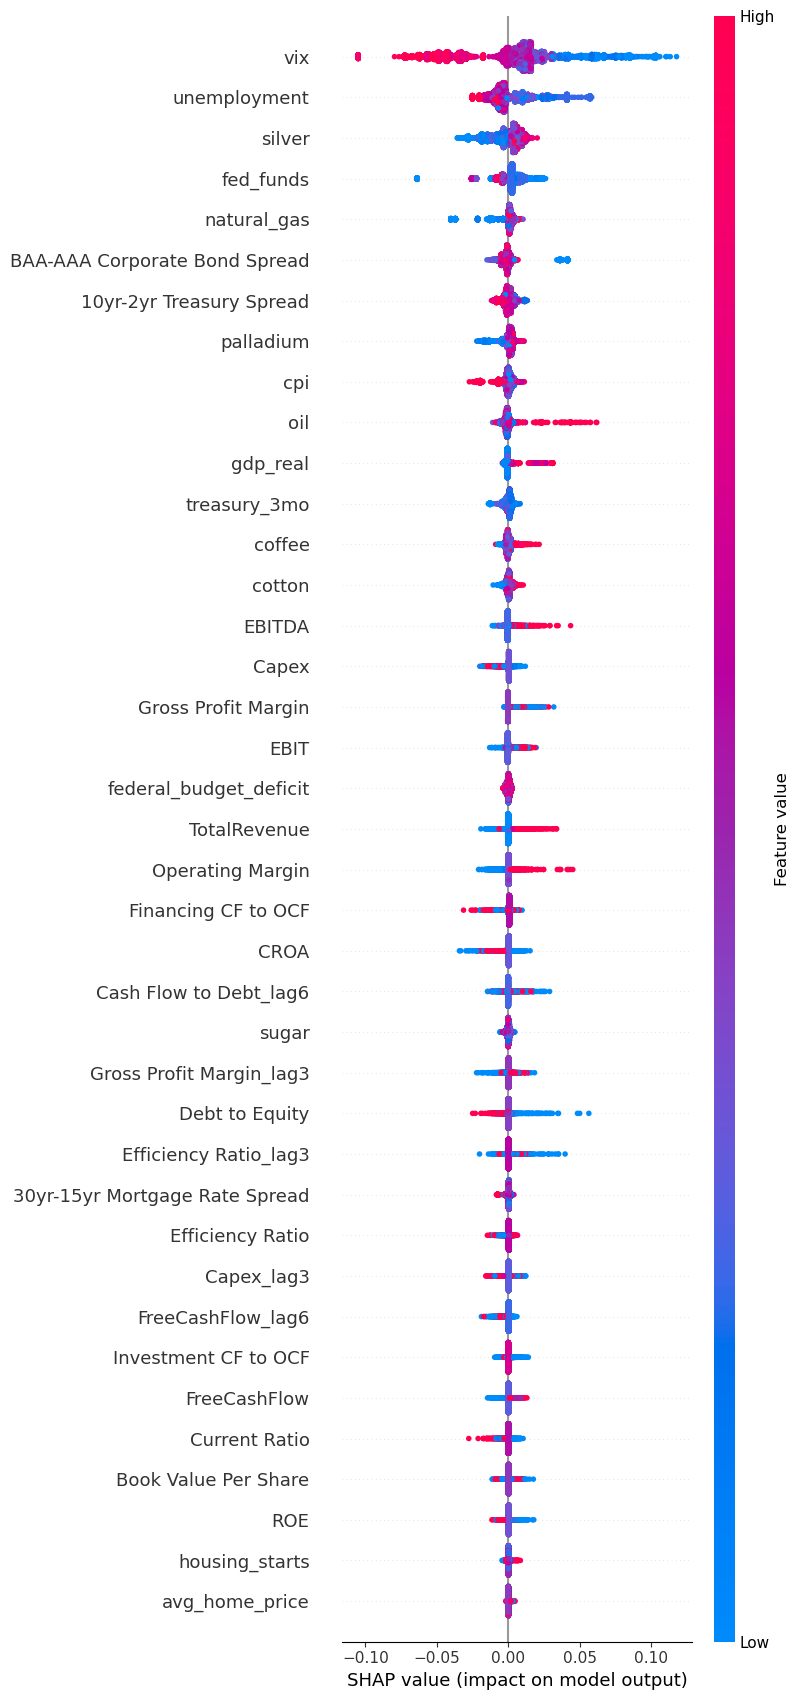

In [18]:
# Create a pipeline (LGBM)
pipeline_gbt = Pipeline(steps=[
	('preprocessor', preprocessor),
	('model', LGBMRegressor(device='gpu', random_state=42, verbose=-1))
])

# Multicollinearity
mc = MulticollinearityCV(pipeline_gbt, cv=cv)
mc.fit(X, y)
X_gbt = X[mc.selected_features_].copy()
del mc
# RFE
rfe = RFECV(pipeline_gbt, cv=cv, scoring='r2')
rfe.fit(X_gbt, y)
# Unsupport features
unsupport = rfe.support_.query('Support == False')
X_gbt.drop(columns=unsupport.index.to_list(), inplace=True)
del rfe, unsupport

# Evaluate LightGBM
evaluate_gbt = Evaluate(pipeline_gbt, cv)
evaluate_gbt.fit(X_gbt, y)
display(evaluate_gbt.metrics_cv_)
evaluate_gbt.shap_plot()

#### Tuning

I'll use a Randomized Search to tune the hyperparameters of the models.

The LightGBM model especially could benefit from tuning while the linear model is likely to be less impacted, although Elastic Net may yield some benefits through stablizing coefficients and penalizing any remaining multicollinearity.

##### Linear

In [19]:
from cuml.linear_model import ElasticNet
from utils import Tuner

# Base line scores
print('Linear Score (Base):', np.mean(cross_val_score(pipeline_linear, X_linear, y, cv=cv, scoring='r2')))
print('Linear MAE (Base):', np.mean(cross_val_score(pipeline_linear, X_linear, y, cv=cv, scoring='mae')))

# Tune Linear
try:
	best_params = Tuner.load_params(f'model/{SECTOR}/linear_params.pkl')
except:
	tuner = Tuner(ElasticNet(), preprocessor, Tuner.elasticnet_param_dist, cv=cv, n_iter=20000, random_state=42, verbose=1, scoring='r2')
	tuner.fit(X_linear, y).save_params(f'model/{SECTOR}/linear_params.pkl')
	print('Linear Best Params:', tuner.best_params_)
	best_params = tuner.best_params_
	del tuner

# New Linear Pipeline
pipeline_linear = Pipeline(steps=[
	('preprocessor', preprocessor),
	('model', ElasticNet(**best_params))
])

# Score of Regression
print('Linear Score:', np.mean(cross_val_score(pipeline_linear, X_linear, y, cv=cv, scoring='r2')))
print('Linear MAE:', np.mean(cross_val_score(pipeline_linear, X_linear, y, cv=cv, scoring='mae')))

Linear Score (Base): 0.30480884479398596
Linear MAE (Base): 0.0513730846621417
Linear Score: 0.30482333449698557
Linear MAE: 0.0513648745173522


##### LightGBM

In [20]:
# Base scores
print('LightGBM Score (Base):', np.mean(cross_val_score(pipeline_gbt, X_gbt, y, cv=cv, scoring='r2')))
print('LightGBM MAE (Base):', np.mean(cross_val_score(pipeline_gbt, X_gbt, y, cv=cv, scoring='mae')))

# Tune LightGBM
try:
	best_params = Tuner.load_params(f'model/{SECTOR}/gbt_params.pkl')
except:
	tuner = Tuner(pipeline_gbt[-1], preprocessor, Tuner.gbt_param_dist, cv=cv, n_iter=200, random_state=42, verbose=1, scoring='r2')
	tuner.fit(X_gbt, y).save_params(f'model/{SECTOR}/gbt_params.pkl')
	best_params = tuner.best_params_
	del tuner

print('LightGBM Best Params:', best_params)

# New LightGBM Pipeline
pipeline_gbt = Pipeline(steps=[
	('preprocessor', preprocessor),
	('model', LGBMRegressor(**best_params))
])

# Score of the tree model
print('LightGBM Score:', np.mean(cross_val_score(pipeline_gbt, X_gbt, y, cv=cv, scoring='r2')))
print('LightGBM MAE:', np.mean(cross_val_score(pipeline_gbt, X_gbt, y, cv=cv, scoring='mae')))

LightGBM Score (Base): 0.49411597458436596
LightGBM MAE (Base): 0.042187827884235286
LightGBM Best Params: {'colsample_bytree': 0.6424202471887338, 'device': 'gpu', 'learning_rate': 0.0194434736772664, 'max_depth': 19, 'min_child_samples': 21, 'min_child_weight': 0.05126790232288615, 'n_estimators': 615, 'num_leaves': 28, 'random_state': 42, 'reg_alpha': 0.27864646423661144, 'reg_lambda': 0.9082658859666537, 'subsample': 0.6197809453334862, 'verbose': -1}
LightGBM Score: 0.4947843624489381
LightGBM MAE: 0.042083888368299426


The base models were already performing quite close to the tuned model, regularization terms were tuned which may lead to more stable coefficients and a more interpretable model.

#### Evaluation

##### Linear

Median    Mean     STD     Min     Max
R2           29.45%  30.48%   2.14%  27.71%  33.58%
Adjusted R2  29.28%  30.32%   2.14%  27.54%  33.42%
MSE           0.49%   0.49%   0.02%   0.46%   0.51%
RMSE          7.03%   7.01%   0.11%   6.81%   7.12%
MAE           5.09%   5.14%   0.10%   5.02%   5.33%
F-stat       192.05  191.69    6.07  181.57  198.80
P>F          0.0000  0.0000  0.0000  0.0000  0.0000

Score
R2           31.09%
Adjusted R2  30.96%
MSE           0.49%
RMSE          6.99%
MAE           5.12%
F-stat       240.70
P>F          0.0000

findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeOneSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeTwoSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeThreeSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeFourSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeFiveSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmsy10'] not

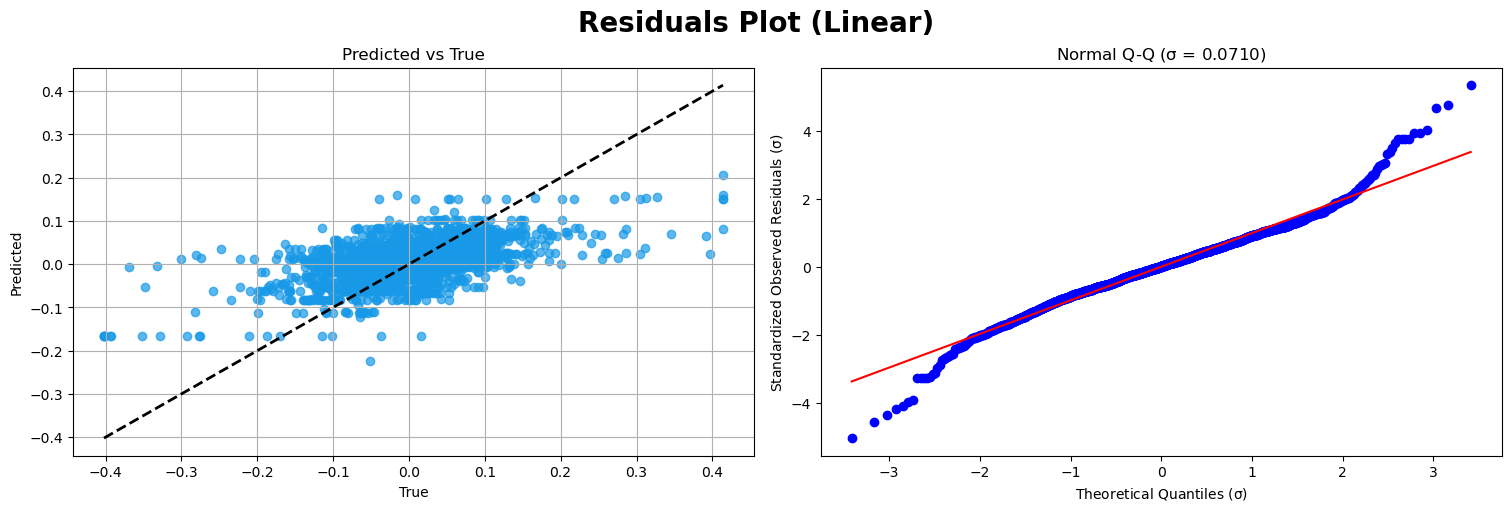

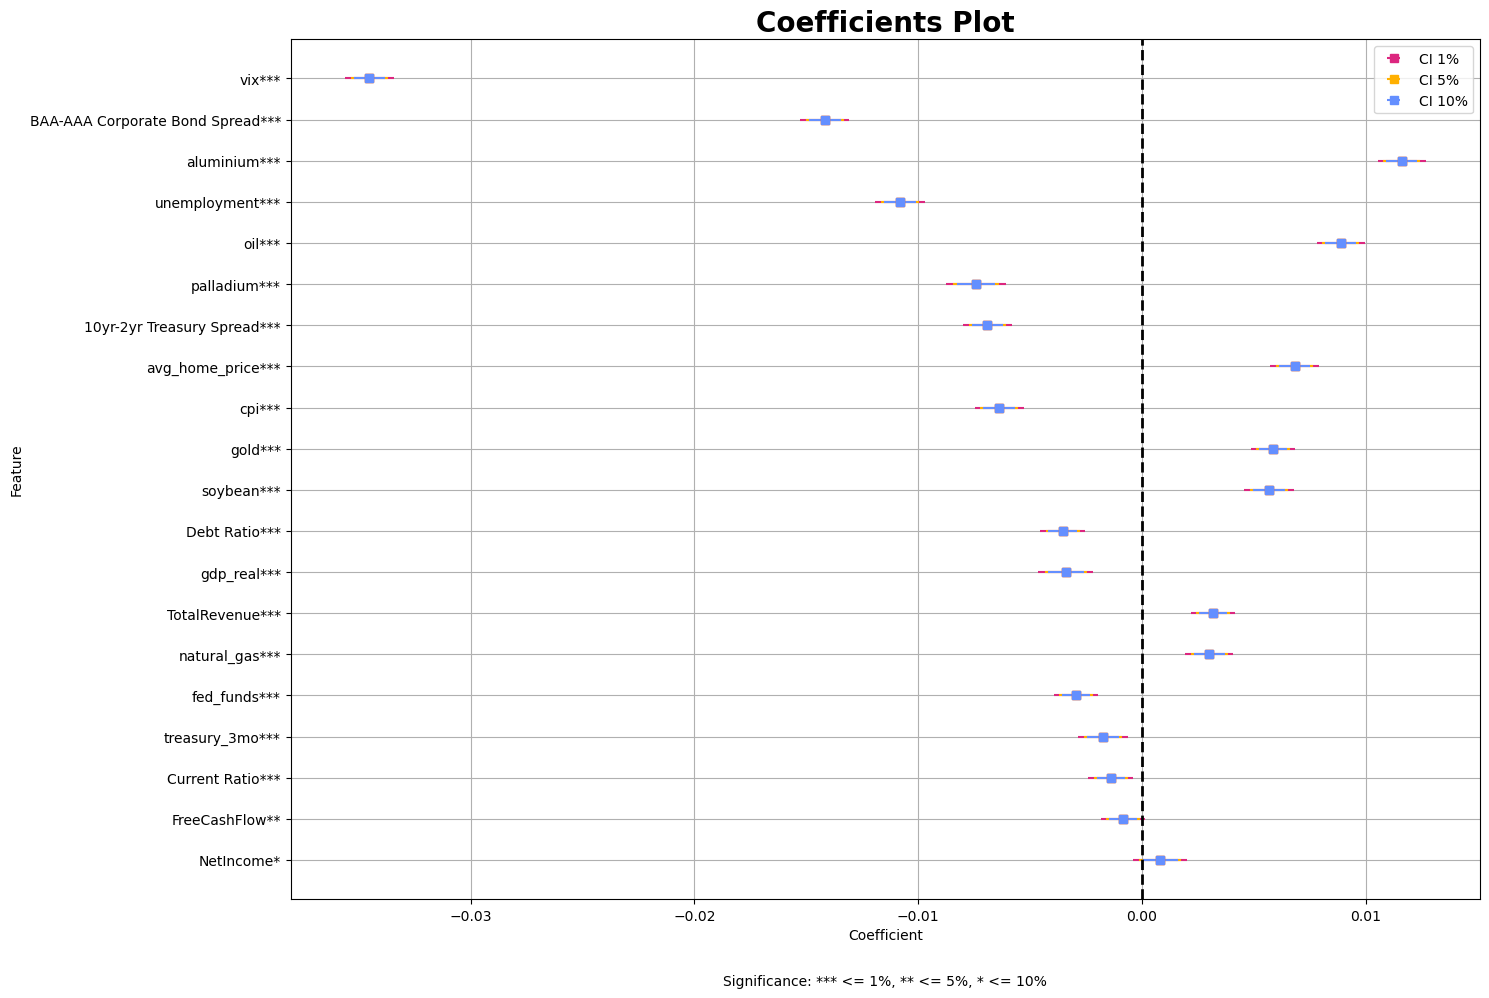

Coef   Std Err        |t|         P>|t|  \
vix***                           -0.034532  0.000427  80.928407  0.000000e+00   
BAA-AAA Corporate Bond Spread*** -0.014171  0.000426  33.283127  0.000000e+00   
aluminium***                      0.011610  0.000420  27.659970  0.000000e+00   
unemployment***                  -0.010829  0.000432  25.091283  0.000000e+00   
oil***                            0.008890  0.000421  21.102733  0.000000e+00   
palladium***                     -0.007423  0.000522  14.219400  0.000000e+00   
10yr-2yr Treasury Spread***      -0.006910  0.000429  16.108630  0.000000e+00   
avg_home_price***                 0.006825  0.000422  16.190385  0.000000e+00   
cpi***                           -0.006385  0.000425  15.031439  0.000000e+00   
gold***                           0.005864  0.000386  15.210977  0.000000e+00   
soybean***                        0.005672  0.000430  13.178291  0.000000e+00   
Debt Ratio***                    -0.003546  0.000386   9.191051  0.000000e+00   
gdp_real***                      -0.003396  0.000477   7.118287  1.180611e-12   
TotalRevenue***                   0.003179  0.000388   8.203830  2.220446e-16   
natural_gas***                    0.002998  0.000421   7.116107  1.199263e-12   
fed_funds***                     -0.002948  0.000385   7.654381  2.153833e-14   
treasury_3mo***                  -0.001752  0.000430   4.076393  4.615135e-05   
Current Ratio***                 -0.001388  0.000389   3.571926  3.563021e-04   
FreeCashFlow**                   -0.000849  0.000384   2.213978  2.685640e-02   
NetIncome*                        0.000813  0.000473   1.718837  8.567995e-02   

                                  t* (10%)  CI (10%)  t* (5%)   CI (5%)  \
vix***                            1.645031  0.000702  1.96024  0.000836   
BAA-AAA Corporate Bond Spread***  1.645031  0.000700  1.96024  0.000835   
aluminium***                      1.645031  0.000691  1.96024  0.000823   
unemployment***                   1.645031  0.000710  1.96024  0.000846   
oil***                            1.645031  0.000693  1.96024  0.000826   
palladium***                      1.645031  0.000859  1.96024  0.001023   
10yr-2yr Treasury Spread***       1.645031  0.000706  1.96024  0.000841   
avg_home_price***                 1.645031  0.000693  1.96024  0.000826   
cpi***                            1.645031  0.000699  1.96024  0.000833   
gold***                           1.645031  0.000634  1.96024  0.000756   
soybean***                        1.645031  0.000708  1.96024  0.000844   
Debt Ratio***                     1.645031  0.000635  1.96024  0.000756   
gdp_real***                       1.645031  0.000785  1.96024  0.000935   
TotalRevenue***                   1.645031  0.000638  1.96024  0.000760   
natural_gas***                    1.645031  0.000693  1.96024  0.000826   
fed_funds***                      1.645031  0.000634  1.96024  0.000755   
treasury_3mo***                   1.645031  0.000707  1.96024  0.000842   
Current Ratio***                  1.645031  0.000639  1.96024  0.000762   
FreeCashFlow**                    1.645031  0.000631  1.96024  0.000752   
NetIncome*                        1.645031  0.000778  1.96024  0.000927   

                                   t* (1%)   CI (1%)  
vix***                            2.576401  0.001099  
BAA-AAA Corporate Bond Spread***  2.576401  0.001097  
aluminium***                      2.576401  0.001081  
unemployment***                   2.576401  0.001112  
oil***                            2.576401  0.001085  
palladium***                      2.576401  0.001345  
10yr-2yr Treasury Spread***       2.576401  0.001105  
avg_home_price***                 2.576401  0.001086  
cpi***                            2.576401  0.001094  
gold***                           2.576401  0.000993  
soybean***                        2.576401  0.001109  
Debt Ratio***                     2.576401  0.000994  
gdp_real***                       2.576401  0

In [21]:
from utils import Evaluate

# Linear
# Calculate the metrics
evaluate_linear = Evaluate(pipeline_linear, cv)
evaluate_linear.fit(X_linear, y)
# Drop insignificant features
X_linear = X_linear.drop(columns=evaluate_linear.linear_stats().query('`P>|t|` > 0.1').index)
evaluate_linear.fit(X_linear, y)
display(evaluate_linear.metrics_cv_)
display(evaluate_linear.metrics_)
evaluate_linear.residuals_plot('Residuals Plot (Linear)')
evaluate_linear.importance_plot()
evaluate_linear.linear_stats()

##### LightGBM

Median    Mean     STD     Min     Max
R2           49.49%  49.48%   2.19%  46.01%  52.29%
Adjusted R2  49.26%  49.25%   2.20%  45.77%  52.08%
MSE           0.36%   0.36%   0.01%   0.34%   0.37%
RMSE          6.02%   5.97%   0.09%   5.82%   6.07%
MAE           4.18%   4.21%   0.07%   4.12%   4.32%
F-stat       217.23  217.65    3.91  211.74  223.79
P>F          0.0000  0.0000  0.0000  0.0000  0.0000

Score
R2           57.93%
Adjusted R2  57.78%
MSE           0.30%
RMSE          5.46%
MAE           3.80%
F-stat       336.55
P>F          0.0000

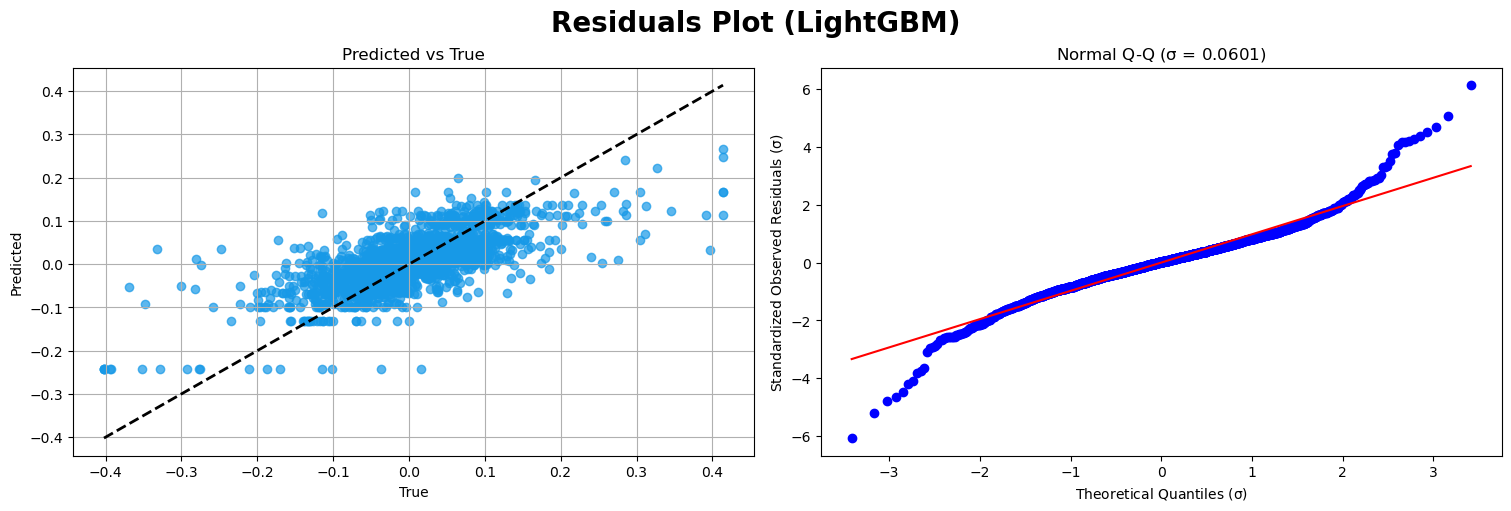

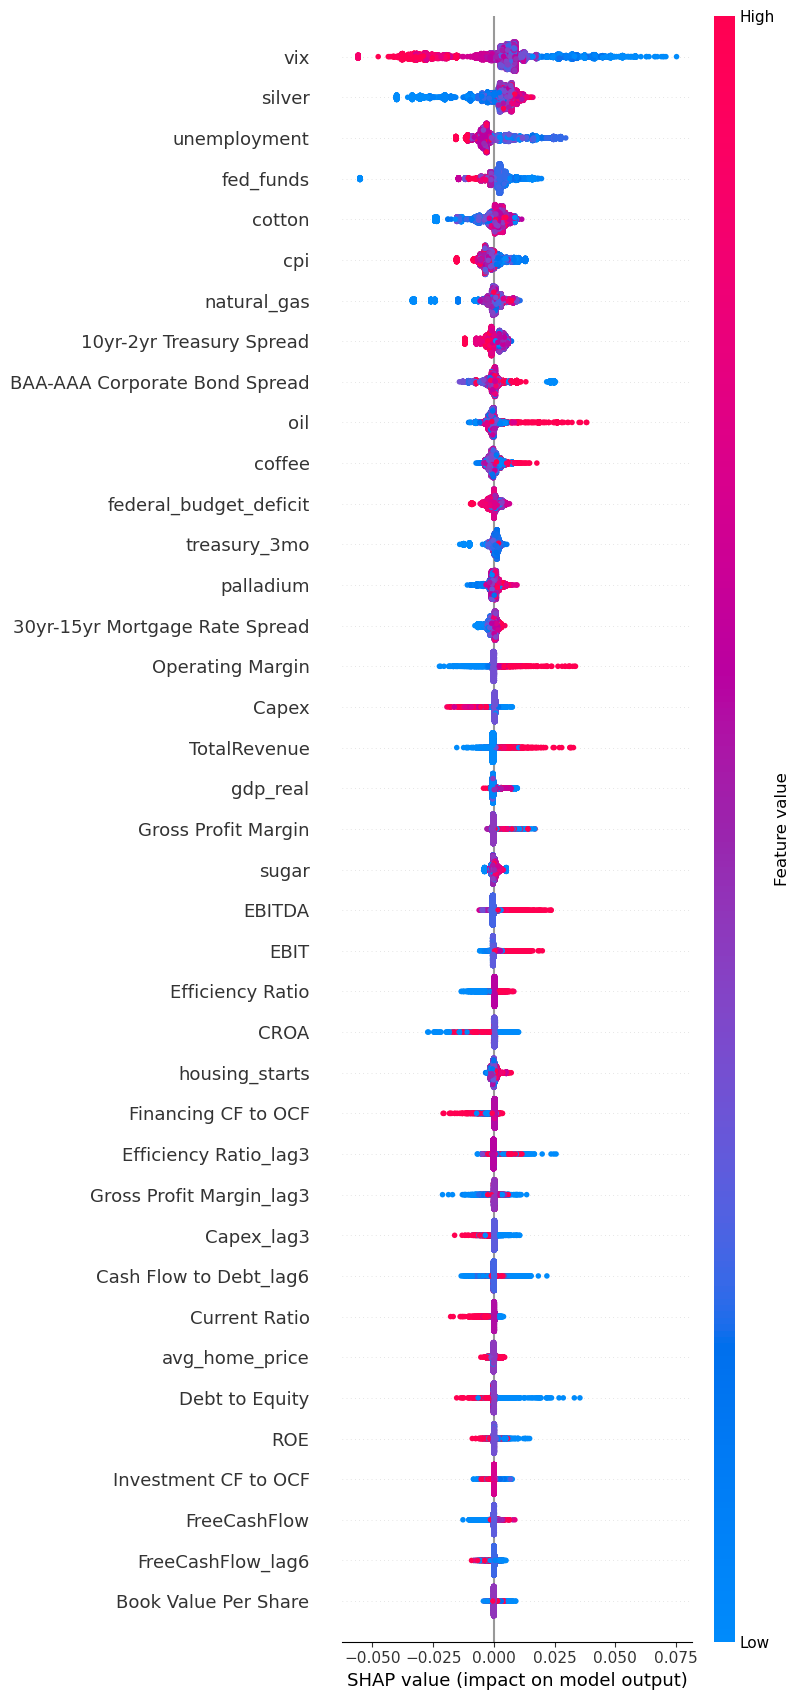

In [22]:
# LightGBM
# Calculate the metrics
evaluate_gbt = Evaluate(pipeline_gbt, cv)
evaluate_gbt.fit(X_gbt, y)
display(evaluate_gbt.metrics_cv_)
display(evaluate_gbt.metrics_)
evaluate_gbt.residuals_plot('Residuals Plot (LightGBM)')
evaluate_gbt.shap_plot()

---